`Covid-19` là một đại dịch bệnh truyền nhiễm với tác nhân là virus `SARS-CoV-2`, hiện đang ảnh hưởng và gây thiệt hại nặng nề trên phạm vi toàn cầu. Kể từ khi đại dịch `Covid-19` bắt đầu xuất hiện ở Vũ Hán - Trung Quốc đến nay, cái tên trường Đại học Jonhs Hopkins (Mỹ) được nhắc đi nhắc lại hằng ngày trên các phương tiện truyền thông và là một trong những cụm từ được trích dẫn nhiều nhất. Lý do đó là Đại học Johns Hopkins đã phát triển một trong những hệ thống theo dõi dữ liệu COVID-19 bền bỉ và đáng tin cậy nhất trên thế giới cho đến nay.

Dữ liệu Covid-19 được đại học `John Hopkins` thu thập và cập nhật hàng ngày tại đây [John Hopkins database](https://github.com/CSSEGISandData/COVID-19).

Trong bài này để hiểu hơn về đại dịch này tôi sẽ hướng dẫn các bạn cách download dữ liệu Covid-19 từ [John Hopkins database](https://github.com/CSSEGISandData/COVID-19) và thực hành các thao tác chuẩn bị dữ liệu (làm sạch và biến đổi) với thư viện `pandas` và trực quan hóa dữ liệu với thư viện `maplotlib` sử dụng ngôn ngữ Python. Sau khi đọc xong bài này các bạn sẽ nắm được:

- Cách download dữ liệu Covid-19 từ `Jonh Hopkins`

- Cách làm sạch và biến đổi dữ liệu dạng `data frame` với thư viện `pandas`: xử lý dữ liệu bị thiếu, gộp các dataframes, chuyển đổi dữ liệu từ dạng `wide format` sang dạng `long fromat`, subset,....

- Cách trực quan hóa dữ liệu `Covid-19` sử dụng thư viện `matplotlib`: Pie chart, Bar chart, Line chart, Multi-Line Chart, xử lý dữ liệu `date` trong vẽ biểu đồ,...

Từ đó các bạn có thể phát triển các kỹ thuật trên thành các `Data visualization Dashboards` hoặc là web tương tác để `tracking` tình hình `Covid-19` trên toàn thế giới tương tự như [John Hopkins University Dashboard](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6), [WHO COVID-19 Dashboard](https://covid19.who.int/),...

### Nội dung chính của bài bao gồm:

[1. Download & chuẩn bị dữ liệu Covid-19 sử dụng thư viện pandas](#prepare-data)

[2. Trực quan hóa dữ liệu Covid-19 sử dụng thư viện matploblib](#data-visualization)

## 1. Download và chuẩn bị dữ liệu{#prepare-data}

Trước hết để thực hành chúng ta cần nạp các thư viện cần thiết trên `Python`:

In [8]:
import keras

ModuleNotFoundError: No module named 'keras'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

 Để thực hành tôi sẽ load 3 tập dữ liệu sau từ kho dữ liệu qua `url_links`:

- `Confirmed:` (Số trường hợp mới phát hiện)

- `Deaths:` (Số trường hợp tử vong)

- `Recovered:` (Số trường hợp hồi phục)

In [2]:
url_confd = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recvd = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_confd = pd.read_csv(url_confd)
df_death = pd.read_csv(url_death)
df_recvd = pd.read_csv(url_recvd)

Kiểm tra thông tin các tập dữ liệu này:

In [3]:
print(df_confd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 225 entries, Province/State to 8/29/20
dtypes: float64(2), int64(221), object(2)
memory usage: 467.7+ KB
None


In [4]:
print(df_death.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 225 entries, Province/State to 8/29/20
dtypes: float64(2), int64(221), object(2)
memory usage: 467.7+ KB
None


In [5]:
print(df_recvd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 225 entries, Province/State to 8/29/20
dtypes: float64(2), int64(221), object(2)
memory usage: 444.9+ KB
None


Kiểm tra 5 hàng đầu tiên của tập dữ liệu `df_confd` (2 tập còn lại tương tự):

In [6]:
print(df_confd.head(5))

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/20  8/21/20  8/22/20  \
0        0        0        0        0  ...    37856    37894    37953   
1        0        0        0        0  ...     7967     8119     8275   
2        0        0        0        0  ...    40258    40667    41068   
3        0        0        0        0  ...     1024     1045     1045   
4        0        0        0        0  ...     2044     2068     2134   

   8/23/20  8/24/20  8/25/20  8/26/20  8/27/20  8/28/20  8/29/20  
0    37999    38054    38070    38113    38129   

Trích xuất thông tin về ngày từ tập dữ liệu:

In [7]:
dates = df_confd.columns[4:]
print(dates)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/19/20', '8/20/20', '8/21/20', '8/22/20', '8/23/20', '8/24/20',
       '8/25/20', '8/26/20', '8/27/20', '8/28/20'],
      dtype='object', length=220)


Các tập dữ liệu này được lưu ở dạng `wide format` do đó chúng ta cần chuyển chúng dạng `long fromat`:

In [7]:
dates = df_confd.columns[4:]
long_df_confd = df_confd.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

long_df_death = df_death.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

long_df_recvd = df_recvd.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

Kiểm tra dữ liệu sau khi đã chuyển:

In [9]:
print(long_df_confd.head(5))

  Province/State Country/Region       Lat       Long     Date  Confirmed
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0
1            NaN        Albania  41.15330  20.168300  1/22/20          0
2            NaN        Algeria  28.03390   1.659600  1/22/20          0
3            NaN        Andorra  42.50630   1.521800  1/22/20          0
4            NaN         Angola -11.20270  17.873900  1/22/20          0


In [10]:
print(long_df_death.head(5))

  Province/State Country/Region       Lat       Long     Date  Deaths
0            NaN    Afghanistan  33.93911  67.709953  1/22/20       0
1            NaN        Albania  41.15330  20.168300  1/22/20       0
2            NaN        Algeria  28.03390   1.659600  1/22/20       0
3            NaN        Andorra  42.50630   1.521800  1/22/20       0
4            NaN         Angola -11.20270  17.873900  1/22/20       0


In [11]:
print(long_df_recvd.head(5))

  Province/State Country/Region       Lat       Long     Date  Recovered
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0
1            NaN        Albania  41.15330  20.168300  1/22/20          0
2            NaN        Algeria  28.03390   1.659600  1/22/20          0
3            NaN        Andorra  42.50630   1.521800  1/22/20          0
4            NaN         Angola -11.20270  17.873900  1/22/20          0


Gộp 3 tập dữ liệu này thành 1 dataframe:

In [12]:
final_df = pd.merge(left=long_df_confd, right=long_df_death, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
final_df = pd.merge(left=final_df, right=long_df_recvd, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])

Chuyển cột dữ liệu ngày về dạng `date`:

In [13]:
final_df['Date'] = pd.to_datetime(final_df['Date'])

Kiểm tra bảng dữ liệu thu được:

In [14]:
print(final_df.head(5))

  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  
0       0        0.0  
1       0        0.0  
2       0        0.0  
3       0        0.0  
4       0        0.0  


Kiểm tra kích thước của bảng dữ liệu thu được:

In [15]:
print(final_df.shape)

(58520, 8)


Kiểm tra khoảng thời gian của dữ liệu được thu thập:

In [16]:
a = final_df.Date.value_counts().sort_index()
print('Ngày bắt đầu là:',a.index[0])
print('Ngày hiện tại là:',a.index[-1])

Ngày bắt đầu là: 2020-01-22 00:00:00
Ngày hiện tại là: 2020-08-28 00:00:00


Kiểm tra `missing values (NaN)` trong tập dữ liệu:

In [17]:
final_df.isna().sum()

Province/State    40700
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered          4180
dtype: int64

Đánh giá phần trăm `missing values` của từng cột dữ liệu:

In [18]:
NAN = [(c, final_df[c].isna().mean()*100) for c in final_df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
print(NAN)

      column_name  percentage
0  Province/State   69.548872
1  Country/Region    0.000000
2             Lat    0.000000
3            Long    0.000000
4            Date    0.000000
5       Confirmed    0.000000
6          Deaths    0.000000
7       Recovered    7.142857


Ta thấy cột `Province/State` có gần `69.55%` dữ liệu bị thiếu và cột `Recovered` có `7,14%`. Vì vậy chúng ta cần xử lý các giá trị thiếu này:

In [19]:
# Thay thế nan thành 0 cho cột Recovered
final_df['Recovered'] = final_df['Recovered'].fillna(0)

In [20]:
# Thay thế nan thành Unknown cho cột Province/State
final_df["Province/State"]= final_df["Province/State"].fillna('Unknown')

Kiểm tra xem trong dữ liệu còn `missing values` không:

In [21]:
final_df.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

Kiểm tra kiểu dữ liệu:

In [22]:
print(final_df.dtypes)

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                float64
dtype: object


Thay đổi kiểu dữ liệu cho các cột `Confirmed, Deaths và Recovered` thành `int`:

In [23]:
final_df[["Confirmed","Deaths","Recovered"]] = final_df[["Confirmed","Deaths","Recovered"]].astype(int)
print(final_df.dtypes)

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int32
Deaths                     int32
Recovered                  int32
dtype: object


Tạo thuộc tính mới `Active` (Số trường hợp còn đang nhiễm sau khi đã trừ đi số trường hợp tử vong và hồi phục): 
$$Active = Confirmed - Deaths - Recovered$$

In [24]:
final_df['Active'] = final_df['Confirmed'] - final_df['Deaths'] - final_df['Recovered']
print(final_df.head(5))

  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0        Unknown    Afghanistan  33.93911  67.709953 2020-01-22          0   
1        Unknown        Albania  41.15330  20.168300 2020-01-22          0   
2        Unknown        Algeria  28.03390   1.659600 2020-01-22          0   
3        Unknown        Andorra  42.50630   1.521800 2020-01-22          0   
4        Unknown         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active  
0       0          0       0  
1       0          0       0  
2       0          0       0  
3       0          0       0  
4       0          0       0  


## 2. Trực quan hóa dữ liệu{#data-visualization}

**2.1 Tổng quan tình hình Covid -19 trên toàn thế giới tính tới thời điểm đang viết bài này:**

Kiểm tra tổng số nước trên toàn thế giới trong tập dữ liệu:

In [25]:
len(final_df['Country/Region'].unique())

188

Tổng các cases trên toàn thế giới:

In [26]:
df = pd.DataFrame(pd.to_numeric(final_df[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()),dtype=np.float64).transpose()
df['Last date'] = max(final_df['Date'])
print(df)

      Confirmed      Deaths    Recovered       Active  Last date
0  1.492646e+09  67290986.0  798778726.0  626576735.0 2020-08-28


Tạo `Pie chart` so sánh các cases trên toàn thế giới:

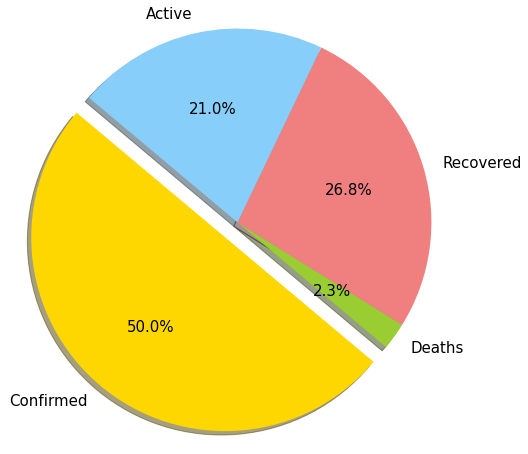

In [27]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
sizes = sum(df.loc[:, 'Confirmed':'Active'].values)
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
f = plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, 
        textprops=dict(size=15,color='black'),
        labels=cases, 
        colors=colors,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
plt.axis('equal')
plt.show()

**2.2 Top 10 nước có số trường hợp (confirmed, deaths, recovered and active cases) lớn nhất**

Tính tổng các `cases` của từng nước tính đến thười điểm hiện tại:

In [28]:
df_countries = final_df.copy().drop(['Lat','Long','Province/State', 'Date'],axis =1)
df_countries = df_countries.groupby(["Country/Region"]).sum()

Top 10 nước có `confirmed cases` lớn nhất:

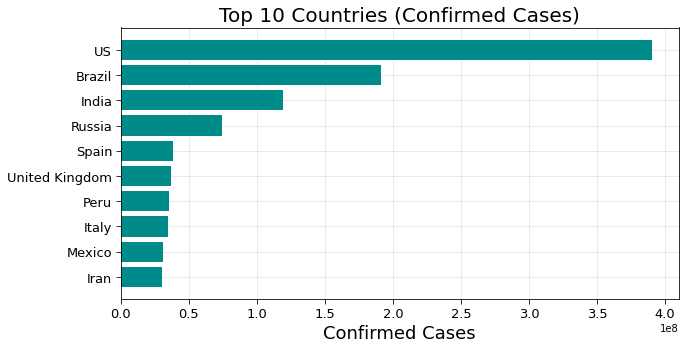

In [29]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)
plt.axes(axisbelow=True)
plt.barh(df_countries.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries.sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

Top 10 nước có `Deaths` lớn nhất:

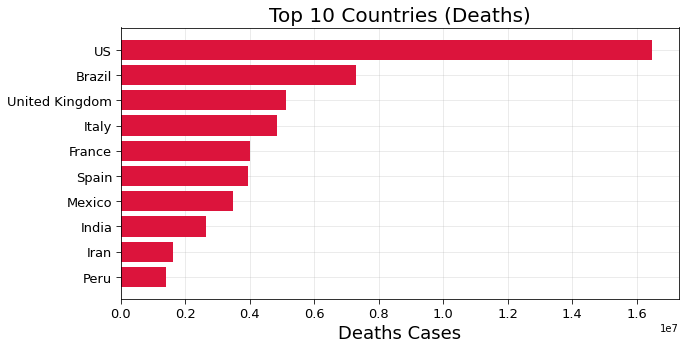

In [30]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries.sort_values('Deaths')["Deaths"].index[-10:],df_countries.sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths)",fontsize=20)
plt.grid(alpha=0.3,which='both')

Top 10 nước có `Recovered Cases` lớn nhất:

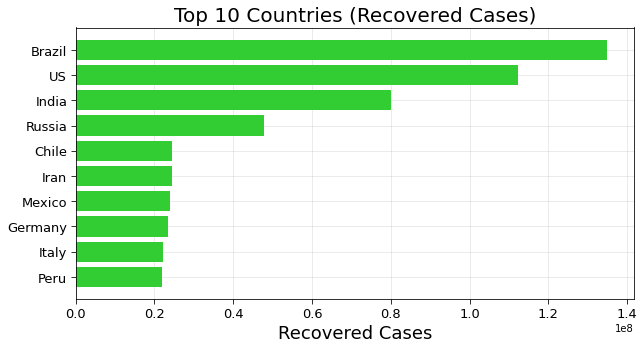

In [31]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries.sort_values('Recovered')["Recovered"].index[-10:],df_countries.sort_values('Recovered')["Recovered"].values[-10:],color="limegreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

Top 10 nước có `Active Cases` lớn nhất:

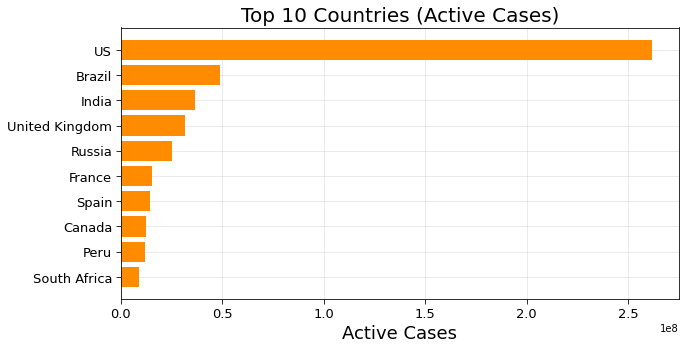

In [32]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries.sort_values('Active')["Active"].index[-10:],df_countries.sort_values('Active')["Active"].values[-10:],color="darkorange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Top 10 Countries (Active Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

**2.3 Mức độ phát triển của Covid-19 theo thời gian trên toàn thế giới**

Tính tổng các `cases` trên toàn thế giới theo thời gian

In [33]:
df_world = final_df.groupby(["Date"])[["Confirmed","Active","Recovered","Deaths"]].sum().reset_index()
df_world.set_index('Date',inplace=True)

Mức độ phát triển của `Confirmed cases` trên toàn thế giới theo thời gian:

C:\Users\svcuo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


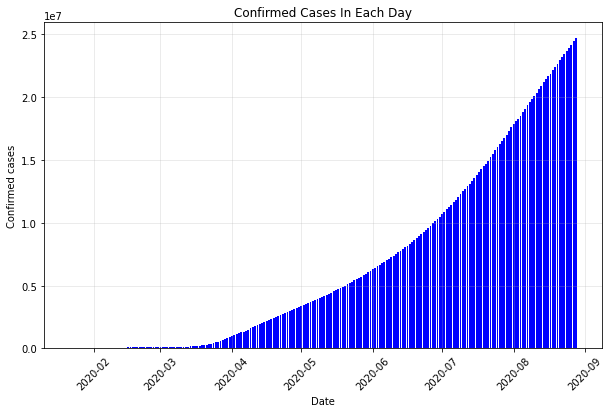

In [34]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Add x-axis and y-axis
ax.bar(df_world.index.values,
        df_world['Confirmed'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Confirmed cases",
       title="Confirmed Cases In Each Day")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
plt.grid(alpha=0.3,which='both')

Mức độ phát triển của `Deaths` trên toàn thế giới theo thời gian:

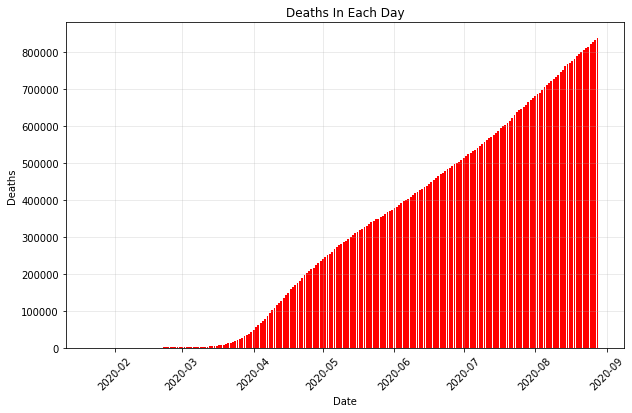

In [35]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Add x-axis and y-axis
ax.bar(df_world.index.values,
        df_world['Deaths'],
        color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Deaths",
       title="Deaths In Each Day")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
plt.grid(alpha=0.3,which='both')

Mức độ phát triển của `Recovered cases` trên toàn thế giới theo thời gian:

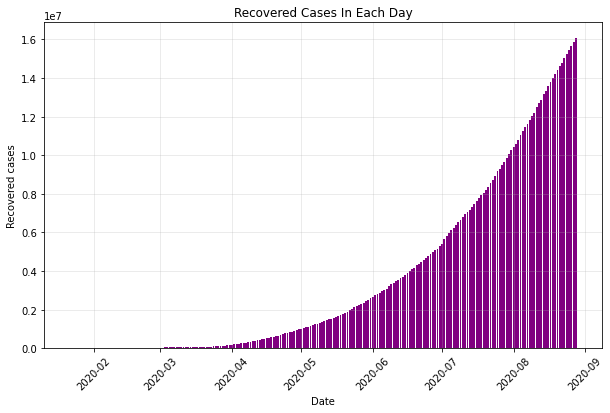

In [36]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Add x-axis and y-axis
ax.bar(df_world.index.values,
        df_world['Recovered'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Recovered cases",
       title="Recovered Cases In Each Day")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
plt.grid(alpha=0.3,which='both')

Mức độ phát triển của `Active Cases` trên toàn thế giới theo thời gian:

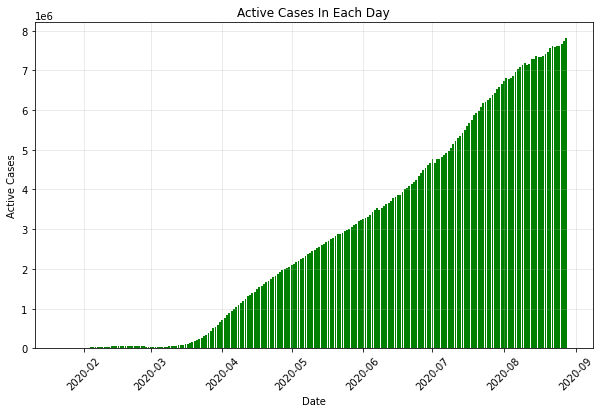

In [37]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Add x-axis and y-axis
ax.bar(df_world.index.values,
        df_world['Active'],
        color= 'green')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Active Cases",
       title="Active Cases In Each Day")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
plt.grid(alpha=0.3,which='both')

**2.4 Hiển thị tất cả các cases trên thế giới theo thời gian**

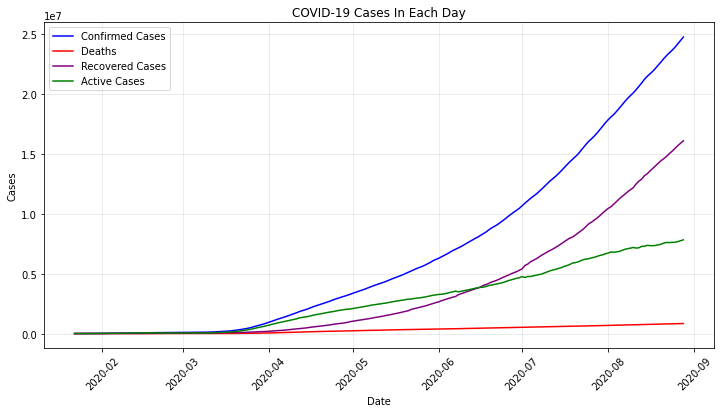

In [38]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))

# Add x-axis and y-axis
ax.plot(df_world.index.values,
        df_world['Confirmed'],
        color='blue', label = 'Confirmed Cases')

ax.plot(df_world.index.values,
        df_world['Deaths'],
        color='red', label = 'Deaths')

ax.plot(df_world.index.values,
        df_world['Recovered'],
        color='purple', label = 'Recovered Cases')


ax.plot(df_world.index.values,
        df_world['Active'],
        color= 'green',  label= 'Active Cases')


# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="COVID-19 Cases In Each Day")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
plt.legend(loc="upper left")
plt.grid(alpha=0.3,which='both')

**2.5 Tổng số lượng các quốc gia trên thế giới xuất hiện dịch bệnh Covid-19 theo thời gian**

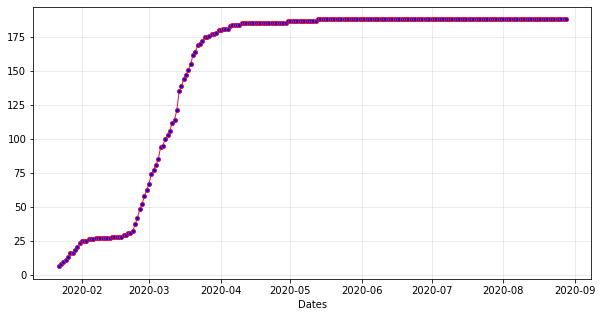

In [39]:
# Tính tổng số lượng các nước xuất hiện dịch Covid-19 theo thời gian
case_nums_country = df_confd.groupby("Country/Region").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(10,5))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=1, linestyle='-', marker='o',markersize=4, markerfacecolor='blue')
plt.plot(df_world.index.values, case_nums_country,**marker_style)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("Dates",fontsize=10)
plt.grid(alpha = 0.3)

**2.6 So sánh sự phát triển của COVID-19 theo thời gian giữa các nước**

So sánh Việt Nam, Mỹ, Nga:

In [40]:
df_Vietnam = final_df[final_df['Country/Region'] == 'Vietnam']
df_Russia = final_df[final_df['Country/Region'] == 'Russia']
df_US = final_df[final_df['Country/Region'] == 'US']

Do Mỹ và Nga cùng có số lượng các `cases` lớn nên biểu thị vào cùng một biểu đồ:

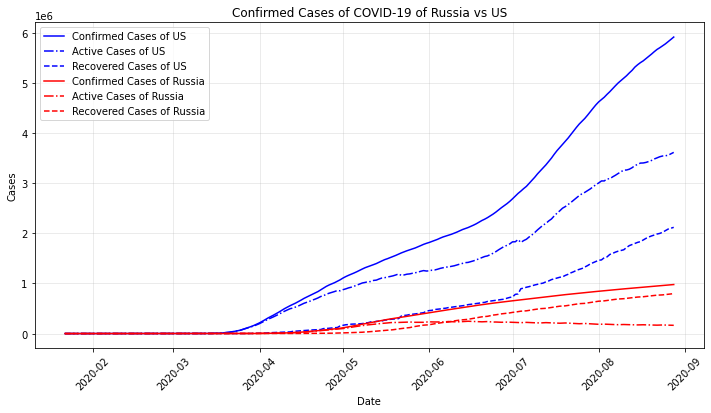

In [41]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))

# Add x-axis and y-axis
ax.plot(df_US['Date'],
        df_US['Confirmed'],
        color='blue', label = 'Confirmed Cases of US')

ax.plot(df_US['Date'],
        df_US['Active'],
        '-.',
        color='blue', label = 'Active Cases of US')

ax.plot(df_US['Date'],
        df_US['Recovered'],
        '--',
        color='blue', label = 'Recovered Cases of US')

ax.plot(df_Russia['Date'],
        df_Russia['Confirmed'],
        color='red', label = 'Confirmed Cases of Russia')

ax.plot(df_Russia['Date'],
        df_Russia['Active'],
        '-.',
        color='red', label = 'Active Cases of Russia')

ax.plot(df_Russia['Date'],
        df_Russia['Recovered'],
        '--',
        color='red', label = 'Recovered Cases of Russia')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="Confirmed Cases of COVID-19 of Russia vs US")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
plt.legend(loc="upper left")
plt.grid(alpha=0.3,which='both')

Việt nam có tổng số các `cases` nhỏ hơn rất nhiều so với Russia và Mỹ nên nếu biểu thị vào cùng 1 biểu đồ thì sẽ rất khó nhìn. Do vậy tôi biểu diễn Việt Nam riêng:

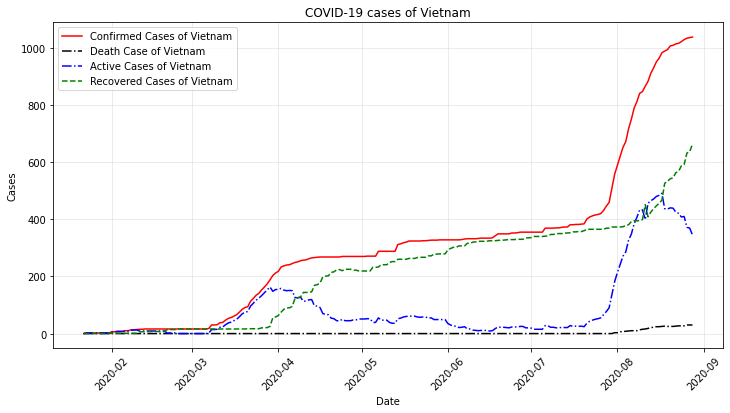

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))

# Add x-axis and y-axis


ax.plot(df_Vietnam['Date'],
        df_Vietnam['Confirmed'],
        color="red", label = 'Confirmed Cases of Vietnam')

ax.plot(df_Vietnam['Date'],
        df_Vietnam['Deaths'],
        '-.',
        color="black", label = 'Death Case of Vietnam')

ax.plot(df_Vietnam['Date'],
        df_Vietnam['Active'],
        '-.',
        color="blue", label = 'Active Cases of Vietnam')

ax.plot(df_Vietnam['Date'],
        df_Vietnam['Recovered'],
        '--',
        color="green", label = 'Recovered Cases of Vietnam')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="COVID-19 cases of Vietnam")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
plt.legend(loc="upper left")
plt.grid(alpha=0.3,which='both')